In [57]:
# Problem 1 Training (Constructing Weights)

import numpy as np
V = np.array([(-1, 1, 1, -1, 1), (1, -1, 1, -1, 1)])
N = len(V[0])
M = 2

W = np.zeros((N,N))

for v in V:
    W += np.dot(v.reshape(5,1),v.reshape(1,5))
    
W = W/N

for i in range(N):
    W[i,i] = 0
    
# Problem 1 Probing

U = np.array([1, 1, 1, 1, 1]).reshape(N,1)

# Problem 1 Dynamic Evolution

# asynchronized update for hopfield neural network
def dynamic_evol(U, p):
    count = 0 # iteration count
    node_count = 0 # consecutively visited node without change in state
    
    while(True):
        new_U = np.copy(U)

        # single node update, dot product of a row in W and U
        current_node = p[count%N]
        new_U[current_node] = np.sign(np.dot(W[current_node,:],U))
        if new_U[current_node] == 0:
            new_U = U

        print "Iteration %d: " % (count+1)
        print new_U.reshape(1,N)

        # check if new state equals to old state
        if np.array_equal(new_U, U):
            node_count += 1
            if node_count == N:
                break
        else:
            node_count = 0
            U = new_U

        count += 1
    
    
p1 = (2, 0, 4, 1, 3) # pattern 1 for node visiting
p2 = (1, 3, 2, 4, 0) # pattern 2 for node visiting

print "Pattern 1: (2, 0, 4, 1, 3)\n"
dynamic_evol(U, p1)

print "\n--------------------------"
print "Pattern 2: (1, 3, 2, 4, 0)\n"
dynamic_evol(U, p2)

Pattern 1: (2, 0, 4, 1, 3)

Iteration 1: 
[[1 1 1 1 1]]
Iteration 2: 
[[-1  1  1  1  1]]
Iteration 3: 
[[-1  1  1  1  1]]
Iteration 4: 
[[-1  1  1  1  1]]
Iteration 5: 
[[-1  1  1 -1  1]]
Iteration 6: 
[[-1  1  1 -1  1]]
Iteration 7: 
[[-1  1  1 -1  1]]
Iteration 8: 
[[-1  1  1 -1  1]]
Iteration 9: 
[[-1  1  1 -1  1]]
Iteration 10: 
[[-1  1  1 -1  1]]

--------------------------
Pattern 2: (1, 3, 2, 4, 0)

Iteration 1: 
[[ 1 -1  1  1  1]]
Iteration 2: 
[[ 1 -1  1 -1  1]]
Iteration 3: 
[[ 1 -1  1 -1  1]]
Iteration 4: 
[[ 1 -1  1 -1  1]]
Iteration 5: 
[[ 1 -1  1 -1  1]]
Iteration 6: 
[[ 1 -1  1 -1  1]]
Iteration 7: 
[[ 1 -1  1 -1  1]]


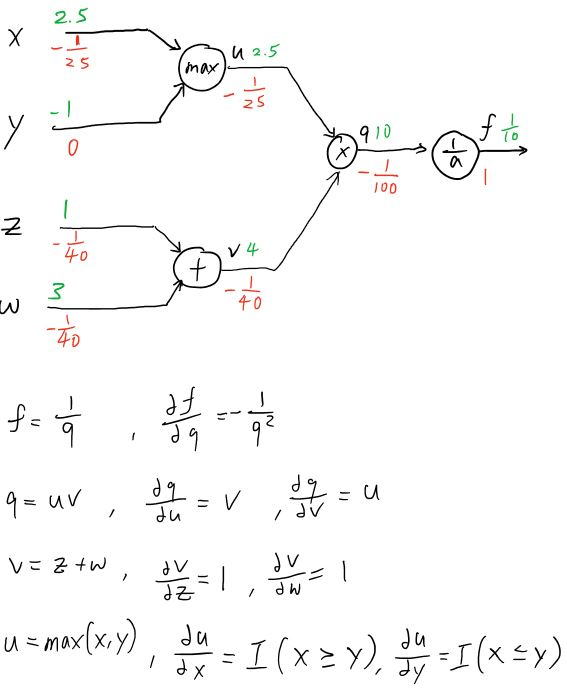

In [1]:
# Problem 2

from IPython.display import Image
Image("Cogs_HW4.2.JPG")

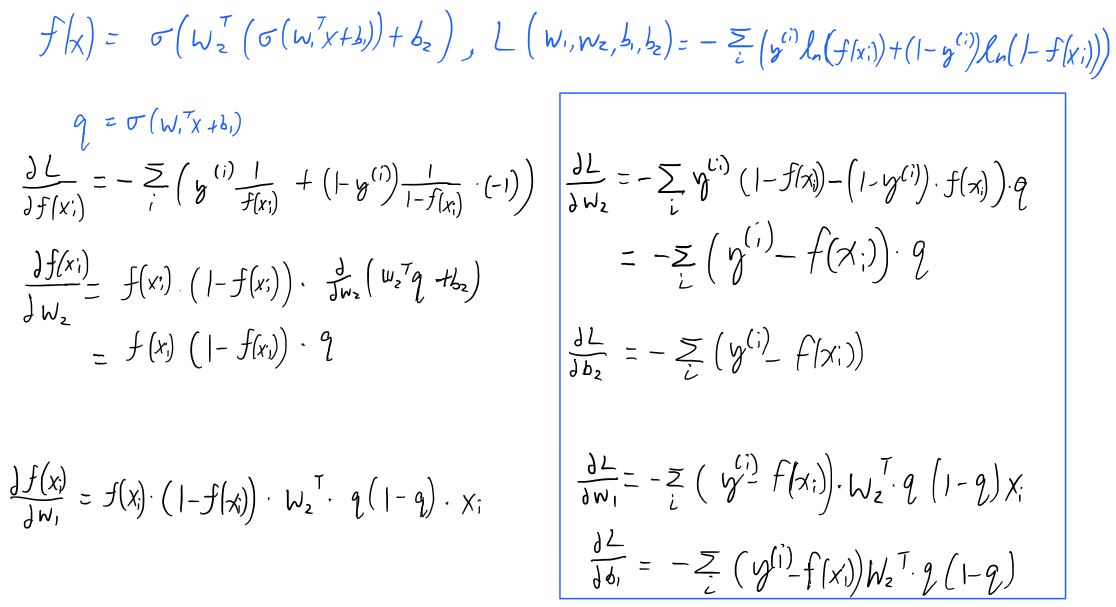

In [12]:
# Problem 3.1

from IPython.display import Image
Image("Cogs_HW4.3.1.JPG")

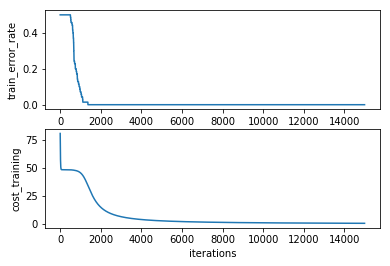

Test error rate = 0.133333


In [6]:
# Problem 3.2 to 3.4
import numpy as np

# cost function, given y and p
def costfunc(y,p):
    cost = -1*(np.sum((y*np.log(p)) + ((1-y)*np.log(1-p))))
    return cost

# number of test data points
TEST_NUMBER = 15

# read data from text file, and map the label to {0,1}
data = np.loadtxt('Q4_data.txt',
                  delimiter=',',
                  converters={-1: lambda s: {b'Iris-versicolor': 0,
                                             b'Iris-virginica': 1}[s]
                  })

# initialize arrays for sorting inputs to test and training sets
# this adds an extra row in the matrix, which needs to be deleted later
test_set_ver = np.ones(len(data[0]))
test_set_vir = np.ones(len(data[0]))
training_set = np.ones(len(data[0]))

# loop thru each data point
for d in data:
    
    # if label == 1
    if d[4]:  
        # if test set isn't full yet, add data point to test set
        if len(test_set_vir) != TEST_NUMBER+1:
            test_set_vir = np.vstack((test_set_vir,d))
        else:
            # add data point to training set
            training_set = np.vstack((training_set,d))
    # if label == 0
    else:
        # if test set isn't full yet, add data point to test set
        if len(test_set_ver) != TEST_NUMBER+1:
            test_set_ver = np.vstack((test_set_ver,d))
        else:
            # add data point to training set
            training_set = np.vstack((training_set,d))
        
# combine the test set for label 0 and 1
test_set = np.vstack((np.delete(test_set_ver, (0), axis=0), np.delete(test_set_vir, (0), axis=0)))

training_set = np.delete(training_set, (0), axis=0) # delete the extra top row

# separate test set into features and label
test_set_y = np.array([x[4] for x in test_set])
test_set_x = np.array([x[:4] for x in test_set])

# separate training set into features and label
training_set_y = np.array([x[4] for x in training_set]).reshape(70,1)
training_set_x = np.array([x[:4] for x in training_set])

# initialize parameters for gradient descent
# W1 = np.zeros((4,2))
# W2 = np.zeros((2,1))
# B1 = np.ones((2,1))
# B2 = np.ones((1,1))
W1 = np.random.rand(4,2)
W2 = np.random.rand(2,1)
B1 = np.random.rand(2,1)
B2 = np.random.rand(1)
alpha = 0.001
cost_training = []
error_rate = []

def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def feed_forward(x,w1,w2,b1,b2):
    return sigmoid(np.dot(w2.T,sigmoid(np.dot(w1.T,x.T)+b1))+b2)
    
# gradient descent
for i in range(15000):

    # calculate f for training set using the given activation rule of perceptron
    f = feed_forward(training_set_x,W1,W2,B1,B2).reshape(70,1)
    #print f
    q = sigmoid(np.dot(W1.T,training_set_x.T)+B1)
    
    # update parameters
    W1 = W1 + alpha*np.dot(np.dot(W2,(training_set_y - f).T)*q*(1-q),training_set_x).T
    B1 = B1 + alpha*np.sum(np.dot(W2,(training_set_y - f).T)*q*(1-q),axis=1).reshape(2,1)
    W2 = W2 + alpha*np.dot(q,(training_set_y - f))
    B2 = B2 + alpha*sum(training_set_y - f)
    
    pred_y = np.array([1 if value > 0.5 else 0 for value in f]).reshape(70,1)
    # keep track of the cost at each iteration
    cost_training.append(costfunc(training_set_y,f))
    
    # obtain classifier error rate with current parameters
    error_rate.append(sum(abs(training_set_y - pred_y))/len(training_set_y))

# obtain test error rate with current parameters
p_test = feed_forward(test_set_x,W1,W2,B1,B2).reshape(30,1)
test_prediction = np.array([1 if p > 0.5 else 0 for p in p_test]).reshape(30,1)
error_rate_test = sum(abs(test_set_y.reshape(30,1) - test_prediction))/len(test_set_y)
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
ax[0].plot(error_rate)
ax[0].set_xlabel('iterations')
ax[0].set_ylabel('train_error_rate')
ax[1].plot(cost_training)
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('cost_training')
plt.show()

print "Test error rate = %f" % error_rate_test

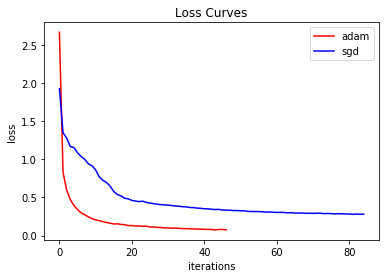

Task 1:
Accuracy with Adam: 0.9528
Accuracy with SGD: 0.9118

Under the condition of all other parameters being the same, the 'adam' solver converges much faster and has higher
accuracy than the 'sgd' solver.


In [68]:
# Problem 4 Task 1

# fetch dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

# training and testing size
TRAIN_SIZE = 60000
TEST_SIZE = 70000 - TRAIN_SIZE

# retrieve data and target
data = mnist['data']
target = mnist['target']

training_data = data[:TRAIN_SIZE]
training_target = target[:TRAIN_SIZE].reshape(TRAIN_SIZE,1)
testing_data = data[TRAIN_SIZE:]
testing_target = target[TRAIN_SIZE:].reshape(TEST_SIZE,1)

# stack data and target for shuffling
training_set_shuffle = np.hstack((training_data,training_target))
np.random.shuffle(training_set_shuffle)

# unstack data and target after shuffling
training_data = training_set_shuffle[:,:784]
training_target = training_set_shuffle[:,784]

from sklearn.neural_network import MLPClassifier
BATCH_SIZE = 200
epoch = TRAIN_SIZE/BATCH_SIZE
c_adam = MLPClassifier(hidden_layer_sizes=(60), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam.fit(training_data, training_target)

c_sgd = MLPClassifier(hidden_layer_sizes=(60), activation='relu', solver = 'sgd', batch_size = BATCH_SIZE, max_iter = epoch)
c_sgd.fit(training_data, training_target)

import matplotlib.pyplot as plt
plt.plot(c_adam.loss_curve_, color = 'r', label = 'adam')
plt.plot(c_sgd.loss_curve_, color = 'b', label = 'sgd')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('Loss Curves')
plt.legend(loc='upper right')
plt.show()

# predict test labels with trained model
pred_testing_target = c_adam.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Task 1:"
print "Accuracy with Adam: " + str(accuracy_test_adam)

pred_testing_target = c_sgd.predict(testing_data)
accuracy_test_sgd = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Accuracy with SGD: " + str(accuracy_test_sgd)

print "\nUnder the condition of all other parameters being the same, the 'adam' solver converges much faster and has higher"
print "accuracy than the 'sgd' solver."

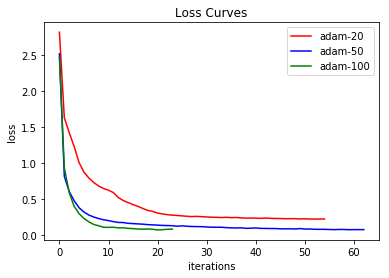

Task 2:
Accuracy with Adam-20: 0.9228
Accuracy with Adam-50: 0.9499
Accuracy with Adam-100: 0.9589

With a single hidden layer and varying number of hidden units, from these curves I can conclude that more hidden units
will take less iterations to converge and better accuracy.


In [66]:
# Problem 4 Task 2

from sklearn.neural_network import MLPClassifier
BATCH_SIZE = 200
epoch = TRAIN_SIZE/BATCH_SIZE
c_adam_20 = MLPClassifier(hidden_layer_sizes=(20), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam_20.fit(training_data, training_target)

c_adam_50 = MLPClassifier(hidden_layer_sizes=(50), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam_50.fit(training_data, training_target)

c_adam_100 = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam_100.fit(training_data, training_target)

import matplotlib.pyplot as plt
plt.plot(c_adam_20.loss_curve_, color = 'r', label = 'adam-20')
plt.plot(c_adam_50.loss_curve_, color = 'b', label = 'adam-50')
plt.plot(c_adam_100.loss_curve_, color = 'g', label = 'adam-100')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('Loss Curves')
plt.legend(loc='upper right')
plt.show()

# predict test labels with trained model
pred_testing_target = c_adam_20.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Task 2:"
print "Accuracy with Adam-20: " + str(accuracy_test_adam)

pred_testing_target = c_adam_50.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Accuracy with Adam-50: " + str(accuracy_test_adam)

pred_testing_target = c_adam_100.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Accuracy with Adam-100: " + str(accuracy_test_adam)

print "\nWith a single hidden layer and varying number of hidden units, from these curves I can conclude that more hidden units" 
print "will take less iterations to converge and better accuracy."

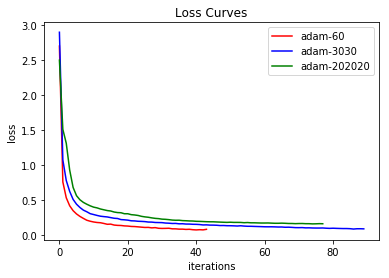

Task 3:
Accuracy with Adam-60: 0.9527
Accuracy with Adam-3030: 0.947
Accuracy with Adam-202020: 0.9343

With the number of hidden units held constant and varying the number of layer and units within each layer,
The single layer with 60 units converges the fastest and has the highest accuracy.
From these three curves, I can conclude that more hidden layers will take more iterations to converge and worse accuracy.


In [67]:
# Problem 4 Task 3

from sklearn.neural_network import MLPClassifier
BATCH_SIZE = 200
epoch = TRAIN_SIZE/BATCH_SIZE
c_adam_60 = MLPClassifier(hidden_layer_sizes=(60), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam_60.fit(training_data, training_target)

c_adam_3030 = MLPClassifier(hidden_layer_sizes=(30,30), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam_3030.fit(training_data, training_target)

c_adam_202020 = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='relu', solver = 'adam', batch_size = BATCH_SIZE, max_iter = epoch)
c_adam_202020.fit(training_data, training_target)

import matplotlib.pyplot as plt
plt.plot(c_adam_60.loss_curve_, color = 'r', label = 'adam-60')
plt.plot(c_adam_3030.loss_curve_, color = 'b', label = 'adam-3030')
plt.plot(c_adam_202020.loss_curve_, color = 'g', label = 'adam-202020')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('Loss Curves')
plt.legend(loc='upper right')
plt.show()

# predict test labels with trained model
pred_testing_target = c_adam_60.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Task 3:"
print "Accuracy with Adam-60: " + str(accuracy_test_adam)

pred_testing_target = c_adam_3030.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Accuracy with Adam-3030: " + str(accuracy_test_adam)

pred_testing_target = c_adam_202020.predict(testing_data)
accuracy_test_adam = float(sum(pred_testing_target.reshape(TEST_SIZE,1) == testing_target))/len(testing_target)

print "Accuracy with Adam-202020: " + str(accuracy_test_adam)

print "\nWith the number of hidden units held constant and varying the number of layer and units within each layer,"
print "The single layer with 60 units converges the fastest and has the highest accuracy."
print "From these three curves, I can conclude that more hidden layers will take more iterations to converge and worse accuracy."

In [60]:
# Problem 4 Task 4

print "The classifier with the highest accuracy (0.9589) is: " + "Adam solver with one hidden layer of 100 hidden units"
print "The setting of this classifier is: " + "'Adam' solver, relu activation, one hidden layer of 100 hidden units"

The classifier with the highest accuracy (0.9589) is: Adam solver with one hidden layer of 100 hidden units
The setting of this classifier is: 'Adam' solver, relu activation, one hidden layer of 100 hidden units
